In [20]:
# import relevant libraries
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from sklearn import preprocessing

warnings.filterwarnings("ignore")

In [56]:
df = pd.read_csv('./data/EPL 19-20 player statistics.csv')
pd.set_option('display.max_columns', None)
df.head(5)

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

In [22]:
df.team.unique()

array(['Manchester United', 'Arsenal', 'Newcastle United',
       'Tottenham Hotspur', 'Southampton', 'Aston Villa', 'Chelsea',
       'Everton', 'Crystal Palace', 'Leicester City', 'Liverpool',
       'West Ham United', 'Brighton and Hove Albion',
       'Wolverhampton Wanderers', 'Manchester City', 'Norwich City',
       'Sheffield United', 'Watford', 'Burnley', 'Bournemouth'],
      dtype=object)

In [23]:
cols = df.columns.tolist()
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 306 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   player_id                                   int64  
 1   position                                    object 
 2   player                                      object 
 3   age                                         float64
 4   team_id                                     int64  
 5   team                                        object 
 6   foot                                        object 
 7   total_scoring_att                           int64  
 8   ontarget_scoring_att                        int64  
 9   blocked_scoring_att                         int64  
 10  goals                                       int64  
 11  own_goals                                   int64  
 12  post_scoring_att                            int64  
 13  total_pass                        

In [24]:
len(cols)

306

In [25]:
df.position.value_counts()

Midfielder    201
Defender      192
Forward       112
Goalkeeper     64
Name: position, dtype: int64

In [26]:
# Drop columns
df1 = df.drop(['position', 'player', 'team', 'foot'], axis=1)

In [27]:
x = df1

In [28]:
x = StandardScaler().fit_transform(x)

In [29]:
pca = PCA(n_components=2)

In [30]:
principalComponents = pca.fit_transform(x)

In [31]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

In [32]:
principalDf

,principal_component_1,principal_component_2
0,9.215638,11.172414
1,-5.434324,10.452845
2,1.872701,9.425396
3,8.112205,10.343809
4,12.558921,-4.069880
...,...,...
564,-9.088758,-2.990612
565,-9.093780,-3.001450
566,-9.137969,-3.107417
567,-9.029262,-2.794730


In [33]:
df[['player']].head()

,player
0,Harry Maguire
1,David de Gea
2,Victor Lindelöf
3,Aaron Wan-Bissaka
4,Daniel James


In [34]:
master_df = pd.concat([principalDf, df[['player']]], axis = 1)
master_df.head(5)

,principal_component_1,principal_component_2,player
0,9.215638,11.172414,Harry Maguire
1,-5.434324,10.452845,David de Gea
2,1.872701,9.425396,Victor Lindelöf
3,8.112205,10.343809,Aaron Wan-Bissaka
4,12.558921,-4.069880,Daniel James


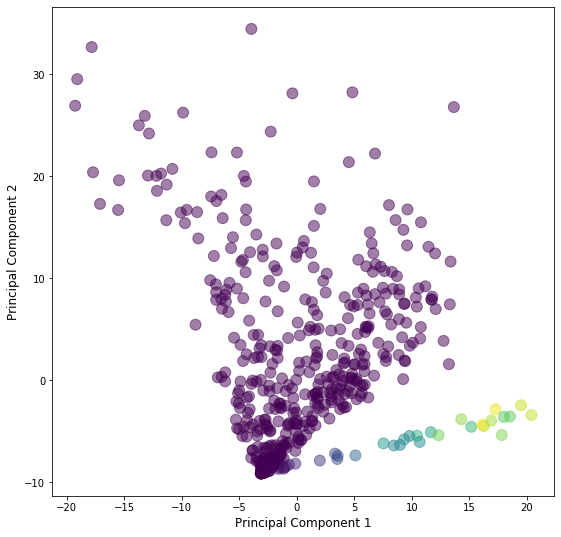

In [37]:
fig, ax = plt.subplots(figsize=(9,9))

v = df['keeper_pick_up']

ax.scatter(master_df['principal_component_2'], master_df['principal_component_1'], s=120, c=v, zorder=2, alpha=0.5)

# Label axis
ax.set_ylabel("Principal Component 2",fontsize=12)
ax.set_xlabel("Principal Component 1",fontsize=12);

# dx, dy = master_df.principal_component_2.values, master_df.principal_component_1.values
# for i in range(len(master_df)):
#     ax.text(dx[i],dy[i]-0.035,master_df.player.iloc[i],ha="center",color="black",zorder=6)
